In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy import asarray as ar,exp
import pylab
import math

In [44]:
T=300
kb=1.38064852*10**(-23)
Na=6.02214e23

def gaussian(x,a,b,c):
    func=a*exp(-(x-b)**2/(2*c**2))
    return(func)

def gaus(x,a,x0,sigma):
    
    return(a*exp(-(x-x0)**2/(2*sigma**2)))

def making_me_bonds(bond):
    data1=pd.read_csv('files/bonds2_' +bond+'.xvg',skiprows=13,delim_whitespace=True, names=["bond","frequency"])
    num=sum(data1['frequency'])
    x= data1['bond']
    y=data1['frequency']/num
    x0 = sum((x)*(y))                  
    sigma = (sum(y*(x-x0)**2))**0.5
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('bond of '+bond)
    plt.ylabel('Frequency')
    #plt.show()
    pylab.savefig(bond+'_bond.png')
    
    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)
    
def making_me_angles(angle,unit):
    data=pd.read_csv('files/angdist2_' +angle+'.xvg',skiprows=13,delim_whitespace=True, names=["Angle","frequency"])
    if unit == 'radians' or unit == 'r':
        x= data['Angle']/57.296
        units=' (radians)'
    else:
        x= data['Angle']
        units=' (degrees)'
    y=data['frequency']

    n = len(data["Angle"])+1
    x0 = sum((x)*(data["frequency"]))
    sigma = sum(y*(x-x0)**2)
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])
    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('Angle of '+angle+units)
    plt.ylabel('Frequency')
    #plt.show()
    pylab.savefig(angle+'_angle.png')

    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)

## Angles

mean=   110.704327
sigma=  11.666903581
force constant=  0.824361939837


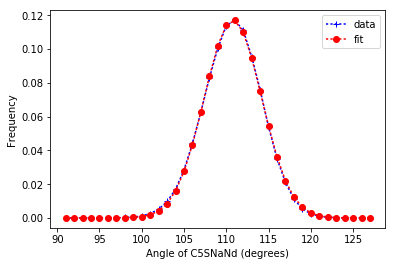

In [13]:
making_me_angles('C5SNaNd','d')
#pylab.savefig('C5SNaNd_angle.png')

mean=   116.830739
sigma=  12.4011648707
force constant=  0.723960421892


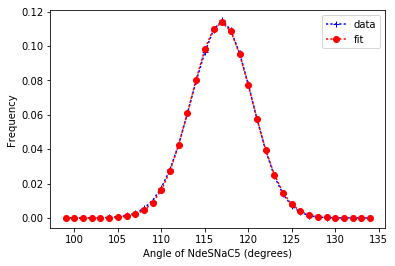

In [14]:
making_me_angles('NdeSNaC5','d')

mean=   124.912127
sigma=  6.8967162964
force constant=  0.637864816002


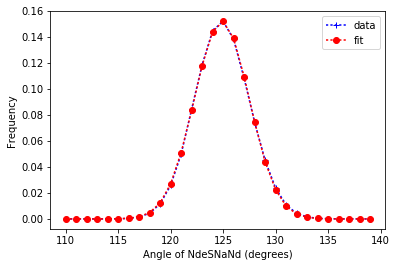

In [15]:
making_me_angles('NdeSNaNd','d')

mean=   162.622998
sigma=  22.1187873367
force constant=  0.401697717982


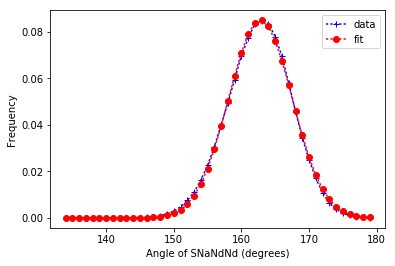

In [16]:
making_me_angles('SNaNdNd','d')

## Bonds

mean=   0.298711271837
sigma=  0.00526967741661
force constant=  126708.869311


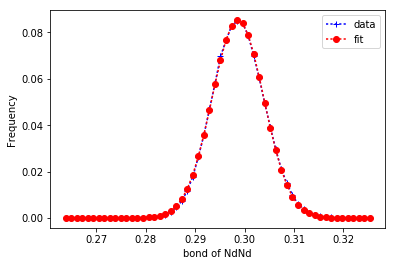

In [17]:
making_me_bonds('NdNd')

mean=   0.309234662519
sigma=  0.00659388861328
force constant=  116806.037298


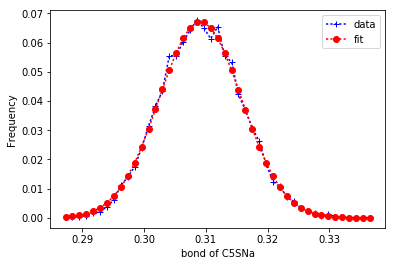

In [18]:
making_me_bonds('C5SNa')

mean=   0.252896709228
sigma=  0.00451869565139
force constant=  188938.256345


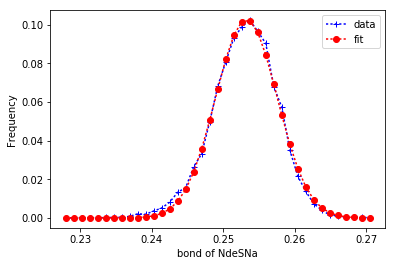

In [19]:
making_me_bonds('NdeSNa')

mean=   0.311080591092
sigma=  0.00399046704003
force constant=  124444.403052


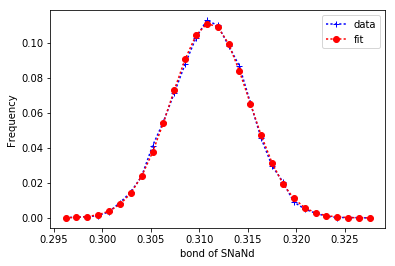

In [20]:
making_me_bonds('SNaNd')

# Dihedrals

mean=   12.017583
sigma=  9.15234209673
[  0.02564565  17.81238541  10.60475754]


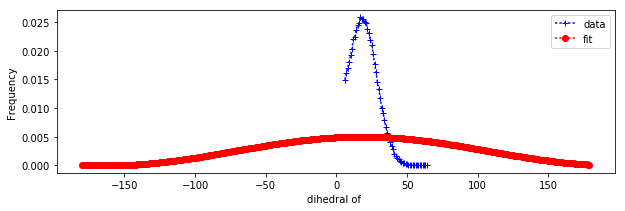

In [194]:
data1=pd.read_csv("files/dihdist2_C5SNaNdNd.xvg", skiprows=13,delim_whitespace=True, names=["dihedral","frequency"])
plt.figure(figsize=(10,3))
#plt.xticks(np.arange(0,10,2)) ##6
#plt.grid()
#plt.plot(data1['dihedral'],data1['frequency'])
#plt.show()
def gaussian(x,a,b,c):
    func=a*exp(-(x-b)**2/(2*c**2))
    return(func)

def gaus(x,a,x0,sigma):
    
    return(a*exp(-(x-x0)**2/(2*sigma**2)))

data10=data1.loc[69::]
datame=data10.reset_index(drop=True)
#data1.tail(60)
#print(datame)
#plt.plot(datame['dihedral'],datame['frequency'],'o')

#print(datame)



x= datame['dihedral']
y= datame['frequency']
#y1=(np.log(datame['frequency']+0.00005))
#y=y1+0.00005
#y=y1-np.min(y1)
#print(y)
x0 = sum((x)*(y))                  
sigma = (sum(y*(x-x0)**2))**0.5
print('mean=  ',x0)
print('sigma= ',sigma)
popt_gaus,pcov_gaus = curve_fit(gaus,x,y,p0=[1,x0,sigma])
print(popt_gaus)
xnew=np.arange(-180,180,1)
#print(xnew)
#print(gaus(xnew,*popt_gaus))
#plt.plot(x,y,'b+:',label='data')
#plt.plot(x,gaus(x*popt_gaus),'ro:',label='fit')
#plt.legend()
#plt.xlabel('dihedral of ')
#plt.ylabel('log(Frequency+0.00005)')
#plt.show()


#def myfunc(x,k1,b1,k2,b2,k3,b3):
#    return(k1*(1+np.cos(np.deg2rad(x - b1)))+k2*(1+np.cos(2*x-b2))) + k3*(1+np.cos(3*x-b3))            p0=[50,1000,5,-1000,50000,-10])
def myfunc(x,k1,b1):
    return(k1*(1+np.cos(np.deg2rad(x - b1))))
popt_dih,pcov_dih = curve_fit(myfunc,xnew,gaus(xnew,*popt_gaus),p0=[50,1000])
plt.plot(x,y,'b+:',label='data')
plt.plot(xnew,myfunc(xnew,*popt_dih),'ro:',label='fit')
plt.legend()/g
plt.xlabel('dihedral of ')
plt.ylabel('Frequency')
plt.show()

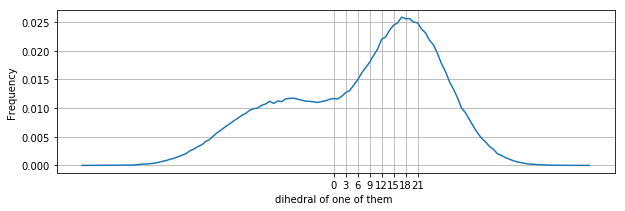

In [11]:
data1=pd.read_csv("files/dihdist2_C5SNaNdNd.xvg", skiprows=13,delim_whitespace=True, names=["dihedral","frequency"])
plt.figure(figsize=(10,3))

plt.xticks(np.arange(0,24,3)) ##6
plt.grid()
plt.plot(data1['dihedral'],data1['frequency'])
plt.xlabel('dihedral of one of them ')
plt.ylabel('Frequency')
plt.show()

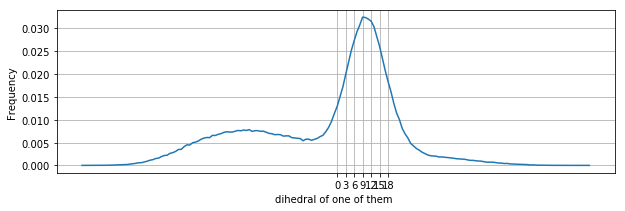

In [12]:
data1=pd.read_csv("files/dihdist2_NdeSNaNdNd.xvg", skiprows=13,delim_whitespace=True, names=["dihedral","frequency"])
plt.figure(figsize=(10,3))

plt.xticks(np.arange(0,20,3)) ##6
plt.grid()
plt.plot(data1['dihedral'],data1['frequency'])
plt.xlabel('dihedral of one of them ')
plt.ylabel('Frequency')
plt.show()

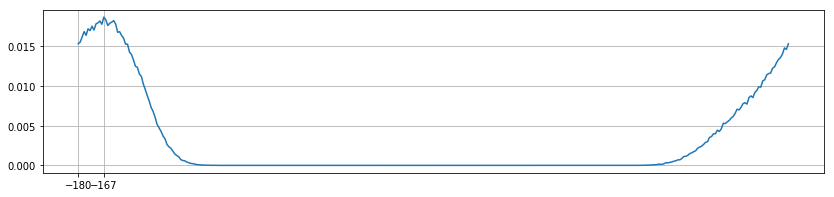

In [20]:
data1=pd.read_csv("files/dihdist2_SNaNdNdSNa.xvg", skiprows=22,delim_whitespace=True, names=["dihedral","frequency"])
plt.figure(figsize=(14,3))

plt.xticks(np.arange(-180,-160,13)) ##6
plt.grid()
plt.plot(data1['dihedral'],data1['frequency'])
plt.show()